In [1]:
# Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [2]:
def preparePercentageString(value, maxValue):
    percentage = '{:0.2f}'.format((value/ maxValue) * 100)
    return f'{percentage}% ({value})'

def draw_companions_impact_plot(file_name):
    df = pd.read_csv(file_name)
    row_amount = len(df.index)
    
    alone_and_survived = np.sum((df['Survived'] == 1) & (df['Companions'] == 0))
    alone_and_died = np.sum((df['Survived'] == 0) & (df['Companions'] == 0))
        
    accompanied_and_survived = np.sum((df['Survived'] == 1) & (df['Companions'] > 0))
    accompanied_and_died = np.sum((df['Survived'] == 0) & (df['Companions'] > 0))
    
    died = [alone_and_died, accompanied_and_died]
    survived = [alone_and_survived, accompanied_and_survived]
    
    spc = np.arange(2)
    plt.ylabel("Amount of people", fontsize=18)
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(spc + 0.45/2, ('Alone', 'Accompanied'), fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    plt.title('Impact of Companions on Survival', fontsize=20)
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i],row_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i],row_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)
        


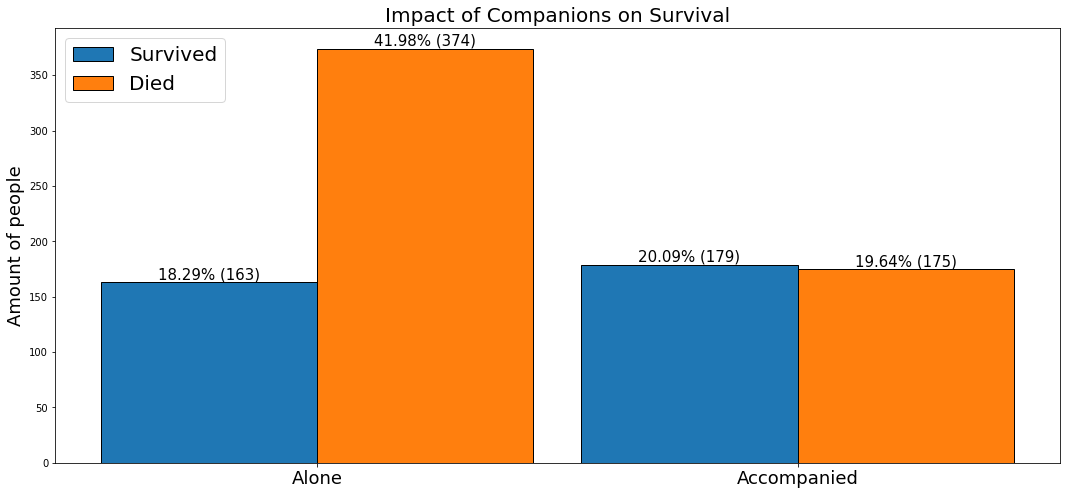

In [20]:
draw_companions_impact_plot("train_data_results.csv")

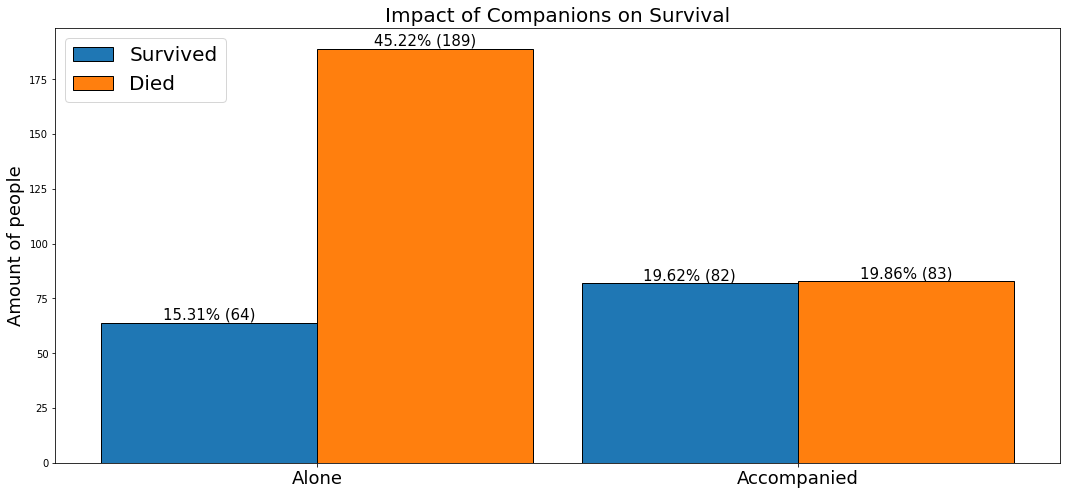

In [4]:
draw_companions_impact_plot("test_data_results.csv")

In [5]:
def draw_entry_place_impact_plot(file_name):
    df = pd.read_csv(file_name)
    row_amount = len(df.index)
    cherbourg_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_C'] == 1))
    cherbourg_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_C'] == 1))
    
    queenstown_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_Q'] == 1))
    queenstown_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_Q'] == 1))
    
    southampton_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_S'] == 1))
    southampton_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_S'] == 1))
    
    survived = [cherbourg_and_survived, queenstown_and_survived, southampton_and_survived]    
    died = [cherbourg_and_died, queenstown_and_died, southampton_and_died]
    
    spc = np.arange(3)
    plt.ylabel("Amount of people", fontsize=18)
    plt.title('Impact of Entry Place on Survival', fontsize=20)

    entry_places = ['Cherbourg', 'Queenstown', 'Southampton']
    X_Tick_List = []
    X_Tick_Label_List=[]
    
    for ep in range (0,len(entry_places)):
        X_Tick_List.append(ep+0.45/2)
        X_Tick_Label_List.append(entry_places[ep])
    
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(X_Tick_List, X_Tick_Label_List, fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i], row_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i], row_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)


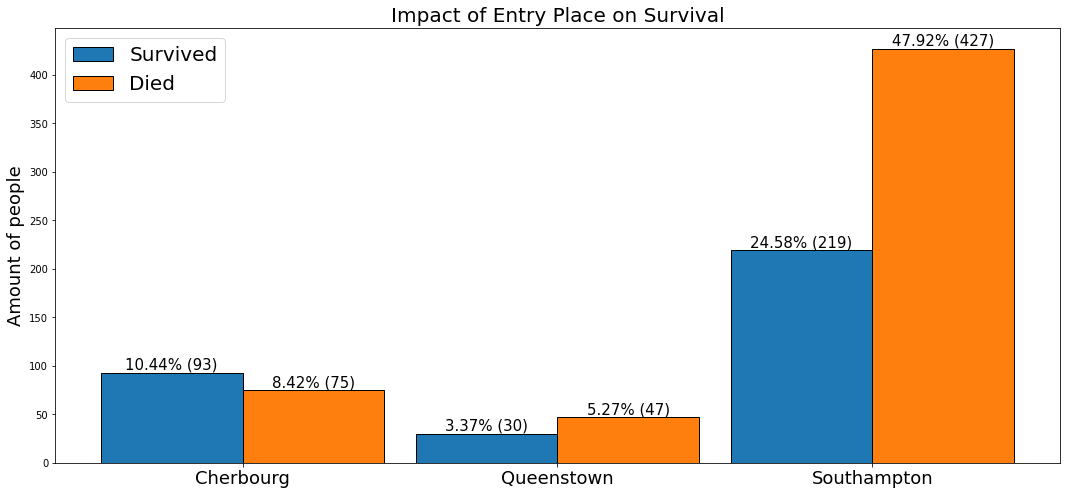

In [6]:
draw_entry_place_impact_plot("train_data_results.csv")

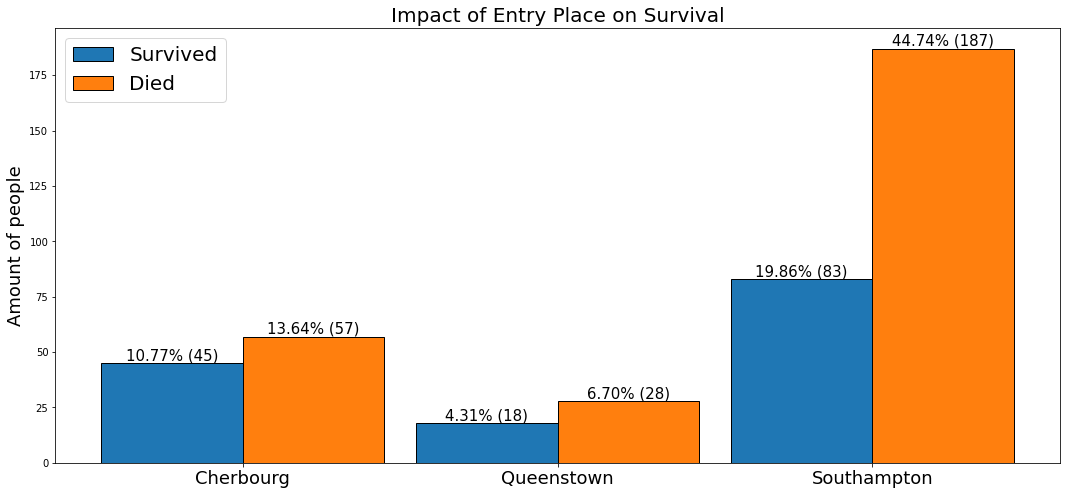

In [7]:
draw_entry_place_impact_plot("test_data_results.csv")

In [11]:
def draw_class_impact_plot(file_name):
    df = pd.read_csv(file_name)
    row_amount = len(df.index)
    one_and_survived = np.sum((df['Survived'] == 1) & (df['Pclass'] == 1))
    one_and_died = np.sum((df['Survived'] == 0) & (df['Pclass'] == 1))
    
    two_and_survived = np.sum((df['Survived'] == 1) & (df['Pclass'] == 2))
    two_and_died = np.sum((df['Survived'] == 0) & (df['Pclass'] == 2))
    
    three_and_survived = np.sum((df['Survived'] == 1) & (df['Pclass'] == 3))
    three_and_died = np.sum((df['Survived'] == 0) & (df['Pclass'] == 3))
    
    survived = [one_and_survived, two_and_survived, three_and_survived]    
    died = [one_and_died, two_and_died, three_and_died]
    
    spc = np.arange(3)
    plt.ylabel("Amount of people", fontsize=18)
    plt.title('Impact of Class on Survival', fontsize=20)

    classes = ['First(Upper)', 'Second(Middle)', 'Third(Lower)']
    X_Tick_List = []
    X_Tick_Label_List=[]
    
    for c in range (0,len(classes)):
        X_Tick_List.append(c+0.45/2)
        X_Tick_Label_List.append(classes[c])
    
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(X_Tick_List, X_Tick_Label_List, fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i], row_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i], row_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)


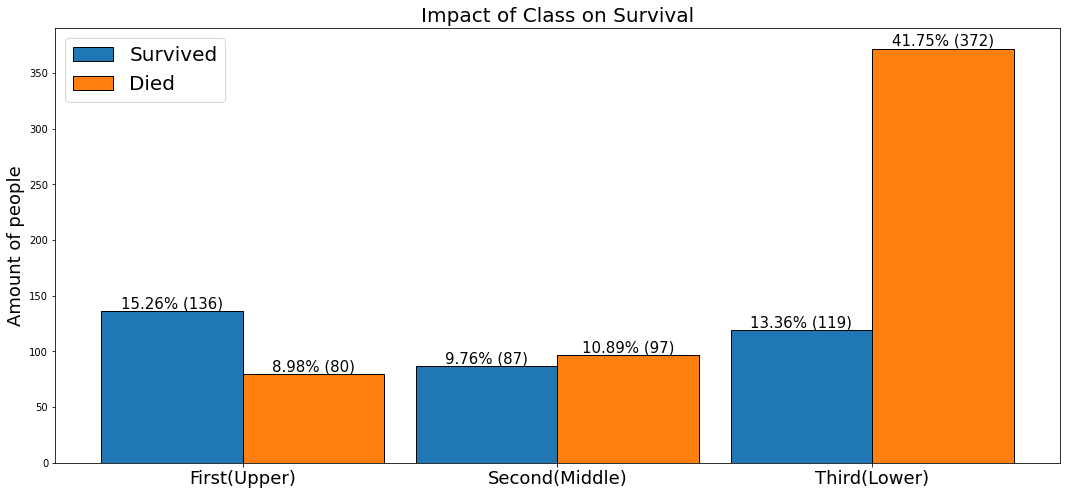

In [12]:
draw_class_impact_plot("train_data_results.csv")

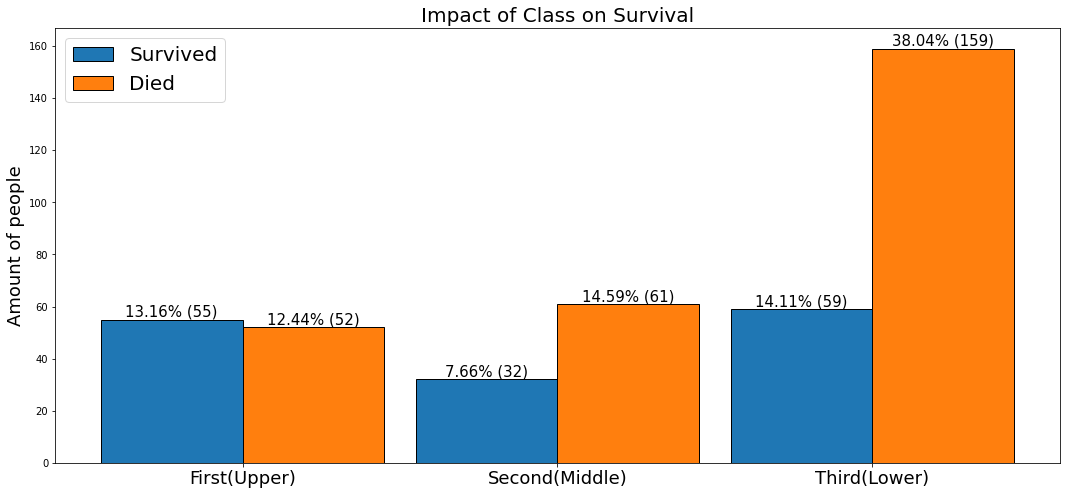

In [13]:
draw_class_impact_plot("test_data_results.csv")

In [14]:
def draw_sex_impact_plot(file_name):
    df = pd.read_csv(file_name)
    row_amount = len(df.index)
    
    men_survived= np.sum((df['Survived'] == 1) & (df['Sex'] == 0))
    men_died = np.sum((df['Survived'] == 0) & (df['Sex'] == 0))
        
    women_survived = np.sum((df['Survived'] == 1) & (df['Sex'] == 1))
    women_died = np.sum((df['Survived'] == 0) & (df['Sex'] == 1))
    
    died = [men_died, women_died]
    survived = [men_survived, women_survived]
    
    spc = np.arange(2)
    plt.ylabel("Amount of people", fontsize=18)
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(spc + 0.45/2, ('Men', 'Women'), fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    plt.title('Impact of Sex on Survival', fontsize=20)
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i],row_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i],row_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)
        

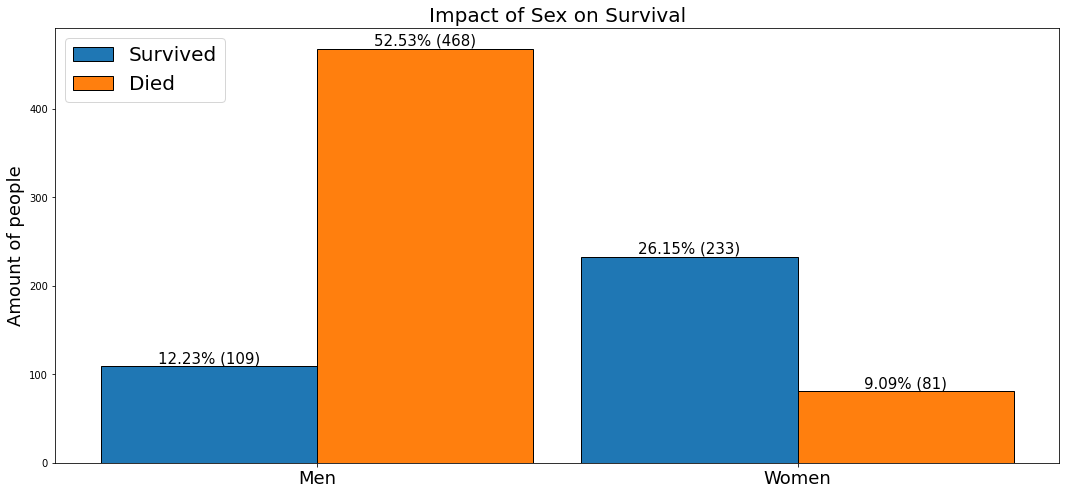

In [15]:
draw_sex_impact_plot("train_data_results.csv")

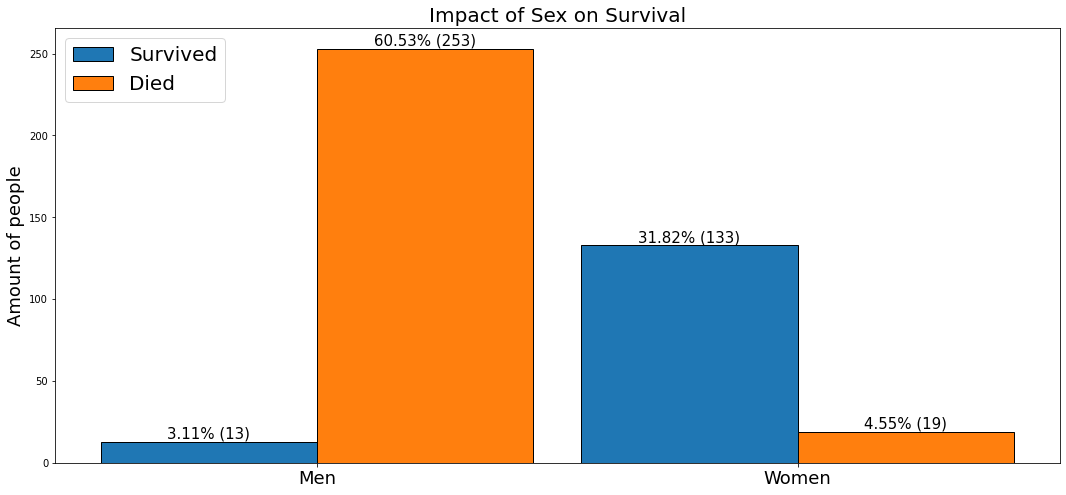

In [16]:
draw_sex_impact_plot("test_data_results.csv")

In [17]:
def draw_age_impact_plot(file_name):
    df = pd.read_csv(file_name)
    row_amount = len(df.index)
    
    minors_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 0) & (df['Age'] < 18))
    minors_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 0) & (df['Age'] < 18))
    
    before_thirties_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 18) & (df['Age'] < 30))
    before_thirties_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 18) & (df['Age'] < 30))
    
    before_forties_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 30) & (df['Age'] <40))
    before_forties_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 30) & (df['Age'] <40))
    
    before_fifties_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 40) & (df['Age'] < 50))
    before_fifties_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 40) & (df['Age'] < 50))
    
    before_sixties_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 50) & (df['Age'] < 60))
    before_sixties_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 50) & (df['Age'] < 60))
    
    older_and_survived = np.sum((df['Survived'] == 1) & (df['Age'] >= 60))
    older_and_died = np.sum((df['Survived'] == 0) & (df['Age'] >= 60))
    
    survived = [minors_and_survived, before_thirties_and_survived, before_forties_and_survived,before_fifties_and_survived,before_sixties_and_survived, older_and_survived]
    died = [minors_and_died,before_thirties_and_died, before_forties_and_died,before_fifties_and_died,before_sixties_and_died,older_and_died]
    
    spc = np.arange(6)
    plt.ylabel("Amount of people", fontsize=18)
    plt.title('Impact of Age on Survival', fontsize=20)

    age_ranges = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']
    X_Tick_List = []
    X_Tick_Label_List=[]
    
    for ar in range (0,len(age_ranges)):
        X_Tick_List.append(ar+0.48/2)
        X_Tick_Label_List.append(age_ranges[ar])
    
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.48, label='Survived', edgecolor='k')
    plt.bar(spc + 0.48, died, width=0.48, label='Died', edgecolor='k')
    plt.xticks(X_Tick_List, X_Tick_Label_List, fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i],row_amount), xy=(i + 0.48,died[i]), ha='center', va='bottom', fontsize=13)
        plt.annotate(preparePercentageString(survived[i],row_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=13)
        
    
    

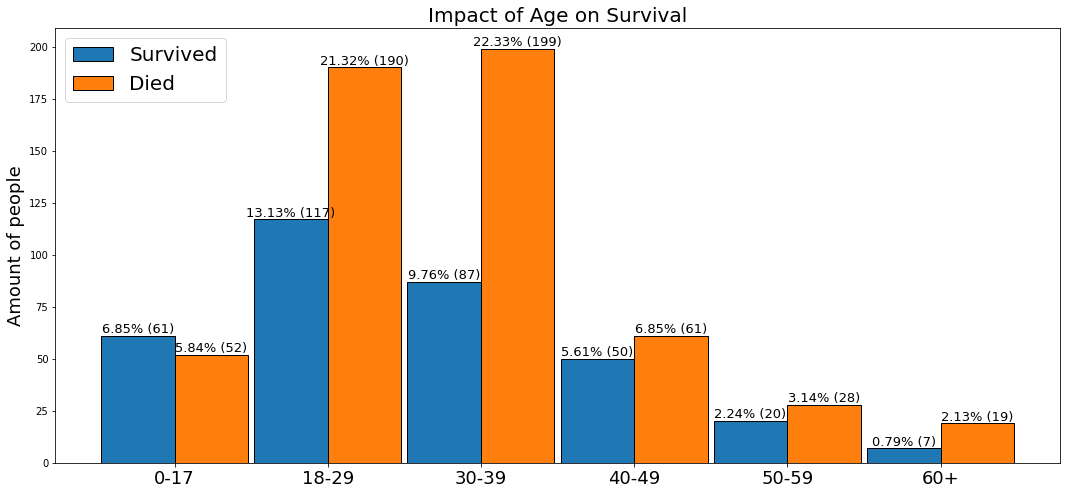

In [18]:
draw_age_impact_plot("train_data_results.csv")

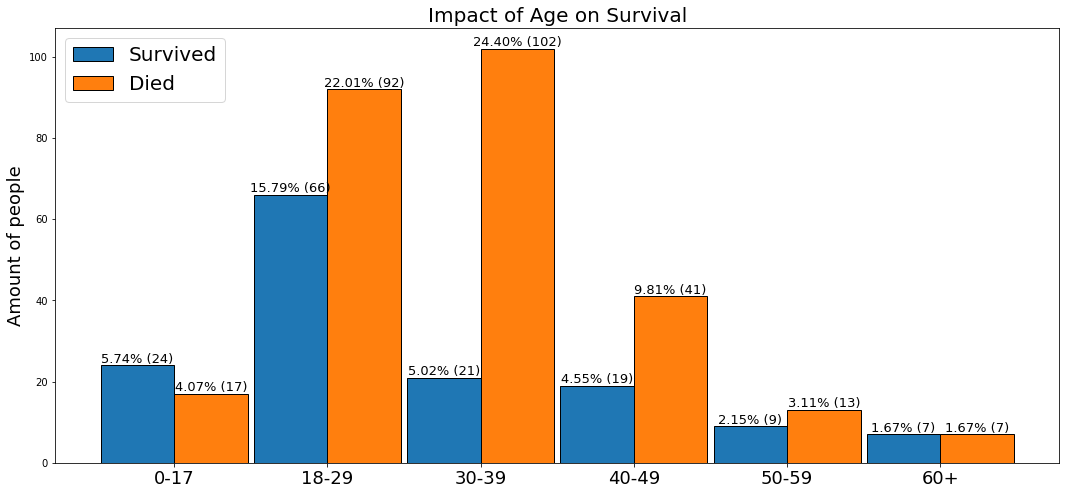

In [19]:
draw_age_impact_plot("test_data_results.csv")